# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
print (temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
print (temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object


#### Select the rows where state is New York

In [8]:
ny_temp=temp[temp["State"]=="New York"]
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [13]:
nymean=ny_temp.Temperature.mean()
nymean

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [14]:
temp_15 = temp[temp['Temperature'] > 15]
temp_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [17]:
temp_cities15=temp_15[["City", "Temperature"]]
temp_cities15

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [18]:
temp_20 = temp_cities15[temp_cities15['Temperature'] < 20]
temp_20

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [28]:
state_mean = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
state_mean

,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


In [29]:
state_mean.set_index("State")

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [30]:
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [35]:
employee.dtypes


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

(array([2., 2., 0., 0., 0., 0., 2., 1., 0., 2.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <BarContainer object of 10 artists>)

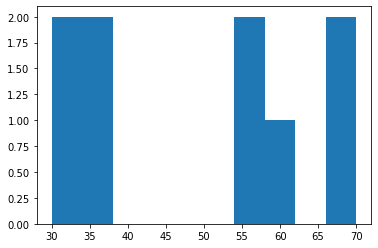

In [37]:
plt.hist(employee.Salary)

#### What's the average salary in this company?

In [38]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [40]:
employee.Salary.max()

70

#### What's the lowest salary?

In [41]:
employee.Salary.min()


30

#### Who are the employees with the lowest salary?

In [43]:
employee[employee["Salary"]==employee.Salary.min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [44]:
employee[employee["Name"]=="David"]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [49]:
employee[employee["Name"]=="David"]["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [50]:
print(employee[employee["Title"]=="analyst"])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
3  Sonia         HR  Bachelor      F  analyst      4      35


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [52]:
print(employee[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [54]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and thesalary above 55?

In [68]:
print(employee[(employee["Title"]=="associate")&(employee["Salary"]>55)])


    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [71]:
years=employee.groupby('Years')['Salary'].agg(['mean']).reset_index()
years

,Years,mean
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [73]:
title=employee.groupby('Title')['Salary'].agg(['mean']).reset_index()
title

,Title,mean
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

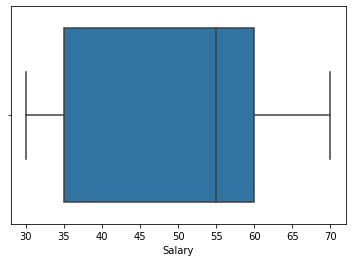

In [76]:
sns.boxplot(x="Salary", data=employee);

In [77]:
print (employee.Salary.quantile(.25))

35.0


In [78]:
print (employee.Salary.quantile(.75))

60.0


#### Is the mean salary per gender different?

In [79]:
gender=employee.groupby('Gender')['Salary'].agg(['mean']).reset_index()
gender

,Gender,mean
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [80]:
dpt=employee.groupby('Department')['Salary'].agg(['mean', 'max', 'min']).reset_index()
dpt

,Department,mean,max,min
0,HR,45.00,70,30
1,IT,48.75,70,30
2,Sales,55.00,55,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [87]:
dpt['range_apply'] = dpt.apply(lambda row: row['max'] - row['min'], axis=1)
dpt

,Department,mean,max,min,range_apply
0,HR,45.00,70,30,40
1,IT,48.75,70,30,40
2,Sales,55.00,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [89]:
orders = pd.read_csv('Orders.zip')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [90]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [113]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [114]:
orders["amount_spent"].max()

168469.6

In [115]:
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [105]:
spain=orders[orders["Country"]=="Spain"]
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


In [96]:
orders.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [106]:
len(orders[orders["Country"]=="Spain"])

2485

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [107]:
items=orders[orders["Quantity"]>50]
items

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [110]:
itemspain=orders[(orders["Quantity"]>50) & (orders["Country"]=="Spain")]
itemspain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [112]:
free=orders[orders["amount_spent"]==0]
free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [117]:
lunch=orders[orders["Description"].str.contains("lunch bag")]
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [119]:
lunch2011=orders[(orders["Description"].str.contains("lunch bag"))&(orders["year"]==2011)]
lunch2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

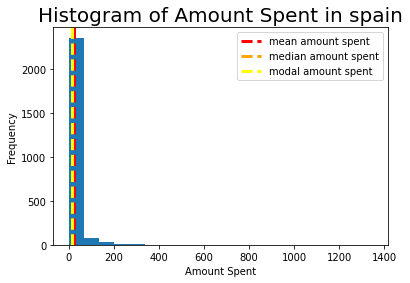

In [128]:
plt.hist(spain["amount_spent"], bins=20)
plt.axvline(spain["amount_spent"].mean(),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean amount spent')
   
plt.axvline(spain["amount_spent"].median(),
            c="orange",
            linewidth= 3.,
            linestyle='--',
            label='median amount spent')

plt.axvline(spain["amount_spent"].mode()[0],
            c="yellow",
            linewidth= 3.,
            linestyle='--',
            label='modal amount spent') # plotting the mode

plt.title('Histogram of Amount Spent in spain', size=20)
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

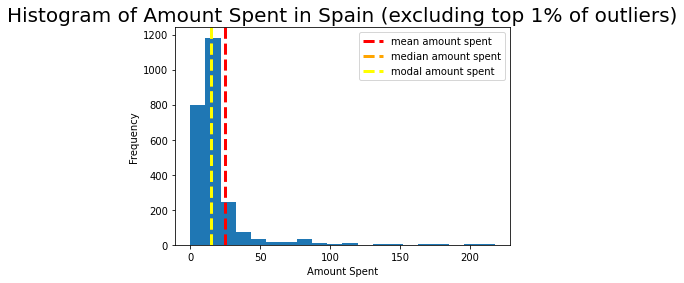

In [129]:
import numpy as np

# Calculate the 99th percentile of the 'amount_spent' column
percentile_99 = np.percentile(spain['amount_spent'], 99)

# Plot the histogram with the top 1% of values excluded
plt.hist(spain.loc[spain['amount_spent'] <= percentile_99, 'amount_spent'], bins=20)
plt.axvline(spain['amount_spent'].mean(),
            c='red',
            linewidth=3.,
            linestyle='--',
            label='mean amount spent')
plt.axvline(spain['amount_spent'].median(),
            c='orange',
            linewidth=3.,
            linestyle='--',
            label='median amount spent')
plt.axvline(spain['amount_spent'].mode()[0],
            c='yellow',
            linewidth=3.,
            linestyle='--',
            label='modal amount spent')
plt.title('Histogram of Amount Spent in Spain (excluding top 1% of outliers)', size=20)
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()


(array([2.355e+03, 7.300e+01, 2.900e+01, 1.000e+01, 7.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00]),
 array([   0. ,   67.5,  135. ,  202.5,  270. ,  337.5,  405. ,  472.5,
         540. ,  607.5,  675. ,  742.5,  810. ,  877.5,  945. , 1012.5,
        1080. , 1147.5, 1215. , 1282.5, 1350. ]),
 <BarContainer object of 20 artists>)

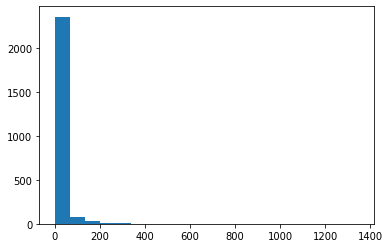

In [124]:
plt.hist(spain["amount_spent"], bins=20)

#### Select all orders made in the month of August

In [130]:
august=orders[orders["month"]==8]
august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [144]:
august.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [145]:
country8=august.groupby("Country").agg({"amount_spent":["mean", "min", "median", "max", "std", "var"], "Quantity":["mean", "min", "median", "max", "std", "var"]})
country8

amount_spent                                       \
                        mean    min   median      max         std   
Country                                                             
Australia         210.179439   9.48  145.000  1260.00  204.959789   
Austria            17.228182   2.88   15.300    80.00   11.815475   
Belgium            18.319691   2.88   16.500    90.00   11.243228   
Canada             10.312000   6.64   10.000    15.00    3.802988   
Channel Islands    34.977000   5.04   19.800   358.00   59.757918   
Denmark            13.321875  10.50   10.500    34.80    6.369431   
EIRE               28.612782   0.00   16.500   510.00   46.504795   
Finland            22.565574   5.04   17.850   120.00   18.786495   
France             24.272337   2.88   16.600   515.52   35.600855   
Germany            24.177069   4.56   17.340   525.60   31.511124   
Iceland            26.586818   8.50   17.000   106.20   25.694749   
Israel             28.501813   2.88   20.000   135.00   25.909801   
Italy              20.957368   6.96   15.600   112.00   15.755829   
Malta              20.345455   2.28   17.000    89.25   14.951604   
Netherlands       144.027893   0.00  108.300   998.40  144.619618   
Norway             26.309221   6.64   17.400   280.00   39.999103   
Poland             23.635294  10.50   17.000    85.92   18.372955   
Portugal           29.790244  10.50   21.000    62.40   18.766630   
Spain              13.281389   0.84    8.775   168.00   17.460393   
Sweden             35.021500   6.96   16.750   518.40   80.858001   
Switzerland        18.613820   4.68   15.900    80.00   10.662000   
United Kingdom     21.573396   0.00   12.500  4176.00   66.423282   
Unspecified        23.088261  13.30   17.400    69.36   15.224077   

                                 Quantity                               \
                          var        mean min median   max         std   
Country                                                                  
Australia        42008.514924  117.476636   4   96.0   576   96.304288   
Austria            139.605450    8.977273   2    8.0    24    4.404745   
Belgium            126.410175   10.664948   1   10.0    50    8.500296   
Canada              14.462720   10.400000   8    8.0    16    3.577709   
Channel Islands   3571.008723   14.350000   1   10.0   200   32.574414   
Denmark             40.569656   21.125000   1   25.0    25    8.492153   
EIRE              2162.695965   15.735245   1   10.0   288   28.926907   
Finland            352.932385   11.360656   1   12.0    48    8.582992   
France            1267.420907   13.985940   1   12.0   288   19.746362   
Germany            992.950924   12.127044   1   10.0   128   12.753928   
Iceland            660.220108   12.590909   3   10.0    36    9.374022   
Israel             671.317774   17.707602   1   12.0   100   17.260185   
Italy              248.246143   12.073684   1   12.0    72   11.756612   
Malta              223.550455    6.945455   1    6.0    25    4.584265   
Netherlands      20914.833781  106.700000   1   96.0   480   89.021781   
Norway            1599.928236    8.259740   1    6.0    36    6.576278   
Poland             337.565476   10.941176   1    6.0    48   12.798782   
Portugal           352.186402   25.024390  10   25.0    50    9.496020   
Spain              304.865313    6.349206   1    4.0    60    8.370711   
Sweden            6538.016362   32.850000   1   10.0   720  117.401907   
Switzerland        113.678236   11.228464   1    8.0   288   18.782197   
United Kingdom    4412.052407   13.453019   1    6.0  2880   45.115678   
Unspecified        231.772515    8.043478   1    4.0    36    9.127771   

                               
                          var  
Country                        
Australia         9274.515958  
Austria             19.401776  
Belgium             72.255034  
Canada              12.800000  
Channel Islands   1061.092446  
Denmark             72.116667  
EIRE    

#### What's the most expensive item?

In [147]:
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [157]:
orders[orders["UnitPrice"]==orders["UnitPrice"].max()]["Description"].values

array(['postage'], dtype=object)

#### What was the average amount spent per year ?

In [160]:
yeear=orders.groupby("year").agg({"amount_spent":"mean"})
yeear

,amount_spent
year,
2010,21.892733
2011,22.430074
